# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face Mask Segmentation
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
import os
project_path = "/content/drive/My Drive/Colab Notebooks/WIDER DATASET"
os.chdir(project_path)

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
#For simplicity we have added the required code here.
data = np.load('images.npy',allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)
Hint - print data[10][1] 

In [6]:
#### Add your code here ####
print (data[50][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.685807150595883, 'y': 0.24209486166007904}, {'x': 0.7865655471289275, 'y': 0.43379446640316205}], 'imageWidth': 1000, 'imageHeight': 1096}]


### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224 #### Add your code here ####
IMAGE_HEIGHT = 224 #### Add your code here ####

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (2 marks)

In [9]:
#### Add your code here ####
X_train.shape

(409, 224, 224, 3)

In [10]:
#### Add your code here ####
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.05098039 -0.17647058 -0.29411763]
  [-0.11372548 -0.23921567 -0.35686272]
  [-0.27843136 -0.40392154 -0.52156866]
  ...
  [-0.34901959 -0.54509807 -0.52941179]
  [-0.47450978 -0.67058825 -0.64705884]
  [-0.2235294  -0.41960782 -0.38823527]]

 [[-0.02745098 -0.16862744 -0.27843136]
  [-0.06666666 -0.20784312 -0.31764704]
  [-0.14509803 -0.29411763 -0.39607841]
  ...
  [-0.36470586 -0.5529412  -0.53725493]
  [-0.49019605 -0.67843139 -0.65490198]
  [-0.26274508 -0.42745095 -0.40392154]]

 [[-0.04313725 -0.18431371 -0.29411763]
  [-0.15294117 -0.29411763 -0.40392154]
  [-0.27058822 -0.41176468 -0.52156866]
  ...
  [-0.34901959 -0.53725493 -0.52156866]
  [-0.48235291 -0.65490198 -0.63921571]
  [-0.25490195 -0.41960782 -0.39607841]]

 ...

 [[ 0.05882359 -0.3098039  -0.43529409]
  [ 0.06666672 -0.30196077 -0.41176468]
  [ 0.03529418 -0.32549018 -0.42745095]
  ...
  [-0.27843136 -0.43529409 -0.42745095]
  [-0.38823527 -0.54509807 -0.53725493]
  [-0.52941179 -0.67058825 -0.67058825]]

 [

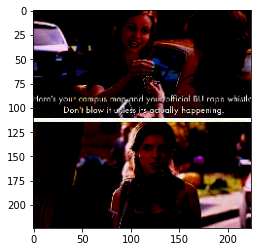

In [11]:
from matplotlib import pyplot
n = 18
print(X_train[n])
pyplot.imshow(X_train[n])

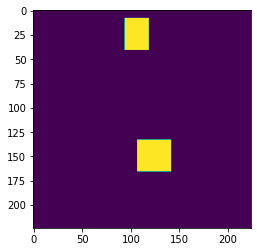

In [124]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

def create_model(trainable=True):

    model = MobileNet(input_shape=(224, 224, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
    
    ## Train the last 7 layers from mobilenet
    model.get_layer("conv_pw_12_relu").trainable=True
    model.get_layer("conv_dw_13").trainable=True
    model.get_layer("conv_dw_13_bn").trainable=True
    model.get_layer("conv_dw_13_relu").trainable=True
    model.get_layer("conv_pw_13").trainable=True
    model.get_layer("conv_pw_13_bn").trainable=True
    model.get_layer("conv_pw_13_relu").trainable=True

    # Add all the UNET layers here
    #### Add your code here ####
    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output
    block0= model.get_layer("conv_pw_3_relu").output
    block001=model.get_layer("conv_pw_1_relu").output
    
    up_conv1_lvl1=Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu')(block3)
    up_conv2_lvl1=Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu')(up_conv1_lvl1)
    up_sample_lv1=UpSampling2D()(up_conv2_lvl1)
    
    up_conc_lvl2=Concatenate()([up_sample_lv1, block2])
    up_conv1_lvl2=Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(up_conc_lvl2)
    up_conv2_lvl2=Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(up_conv1_lvl2)
    up_sample_lv2=UpSampling2D()(up_conv2_lvl2)
    

    up_conc_lvl3=Concatenate()([up_sample_lv2, block1])
    up_conv1_lvl3=Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(up_conc_lvl3)
    up_conv2_lvl3=Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(up_conv1_lvl3)
    up_sample_lv3=UpSampling2D()(up_conv2_lvl3)
    
    up_conc_lvl4=Concatenate()([up_sample_lv3, block0])
    up_conv1_lvl4=Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(up_conc_lvl4)
    up_conv2_lvl4=Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(up_conv1_lvl4)
    up_sample_lv4=UpSampling2D()(up_conv2_lvl4)
    

    up_conc_lvl5=Concatenate()([up_sample_lv4, block001])
    up_conv1_lvl5=Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(up_conc_lvl5)
    up_conv2_lvl5=Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(up_conv1_lvl5)
    up_sample_lv5=UpSampling2D()(up_conv2_lvl5)
    
    output = Conv2D(1, kernel_size=1, activation="sigmoid")(up_sample_lv5)
    return Model(inputs=model.input, outputs=output)

### Call the create_model function

In [13]:

# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(trainable=False)

# Print summary
model.summary()
#tf.keras.utils.plot_model(model, show_shapes=True)

17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________________________

### Define dice coefficient function (10 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
#### Add your code here ####
from tensorflow.keras.optimizers import Adamax, SGD
#optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#optimizer=Adamax(learning_rate=1e-4, beta_1=0.9, beta_2=0.999)
optimizer=SGD(lr=1e-4, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])


### Define checkpoint and earlystopping

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("segmodel-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [75]:
#### Add your code here ####
## The model was trained with many epochs to get to a loss of 0.10 and these 
# weights were stored. We will load the weights inorder to predict the bouding 
# box for the image in the next cell.
EPOCHS=5
history = model.fit(X_train, masks,
                    batch_size=1,
                    epochs=EPOCHS,
                    callbacks=[checkpoint, reduce_lr, stop]
                    )

Epoch 1/5
409/409 [==============================] - ETA: 0s - loss: 0.1084 - dice_coefficient: 0.9525
Epoch 00001: loss improved from inf to 0.10842, saving model to model-0.11.h5
409/409 [==============================] - 528s 1s/step - loss: 0.1084 - dice_coefficient: 0.9525 - lr: 1.0000e-04
Epoch 2/5
409/409 [==============================] - ETA: 0s - loss: 0.1159 - dice_coefficient: 0.9476
Epoch 00002: loss did not improve from 0.10842
409/409 [==============================] - 524s 1s/step - loss: 0.1159 - dice_coefficient: 0.9476 - lr: 1.0000e-04
Epoch 3/5
409/409 [==============================] - ETA: 0s - loss: 0.1153 - dice_coefficient: 0.9471
Epoch 00003: loss did not improve from 0.10842
409/409 [==============================] - 523s 1s/step - loss: 0.1153 - dice_coefficient: 0.9471 - lr: 1.0000e-04
Epoch 4/5
409/409 [==============================] - ETA: 0s - loss: 0.1128 - dice_coefficient: 0.9486
Epoch 00004: loss did not improve from 0.10842
409/409 [===============

In [0]:
#The model was trained for many epochs and the loss was reduced to 0.10. Here those weights
# are bing loaded so that more accuracy can be shown on the bounding boxes.
WEIGHTS_FILE = "model-0.10.h5"
model.load_weights(WEIGHTS_FILE)

### Get the predicted mask for a sample image   (5 marks)

In [0]:
#### Add your code here ####
n = 50
sample_image = X_train[n]
sample_mask=masks[n]
region=model.predict(x=np.array([sample_image]))
preds_val_t = region > 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 1)


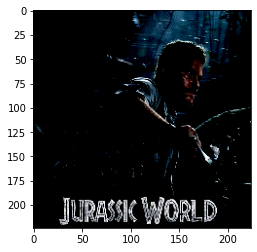

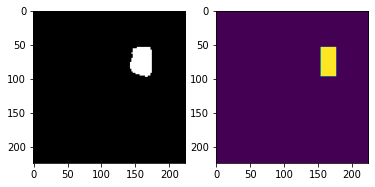

In [74]:
### Impose the mask on the image (5 marks)
print(preds_val_t.shape)
from matplotlib import pyplot
pyplot.imshow(sample_image)

fig=pyplot.figure()
ax=fig.add_subplot(1,2,1)
ax = pyplot.imshow(np.reshape(preds_val_t[0],(224,224)),cmap="gray")

ax=fig.add_subplot(1,2,2)
ax = pyplot.imshow(np.reshape(sample_mask,(224,224)))

In this project, Transfer learning was used to predict the bounding boxes. The model follows a UNet architecture with encoder being the Mobilenet. Mobilenet was loaded with imagenet weights and the last 7 layers were trained. 
The decoder was built using the UNet reference architecture and the model was trained using SGD for gradients on Google colabs. So, internal weights were stored onto the file system and loaded for predicting the faces. We could attain a accuracy of nearly 95% after training for nearly 50 epochs. A sample prediction is shown above.